In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas_datareader.data import DataReader

In [4]:
from datetime import datetime

In [5]:
from __future__ import division

In [6]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [7]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [8]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [9]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,190.081713,186.742749,188.342670,188.430120,3.117305e+07,187.429284
std,20.293355,19.772771,20.068986,20.062939,1.327309e+07,20.705575
min,157.889999,150.240005,154.830002,155.149994,1.251390e+07,153.388489
25%,174.244995,171.715004,172.715004,172.785004,2.251980e+07,171.175766
50%,186.149994,182.539993,183.399994,183.919998,2.798930e+07,183.277222
75%,208.920006,205.454994,207.195000,207.434998,3.658775e+07,206.964157
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,232.070007


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-11-06 to 2018-11-02
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


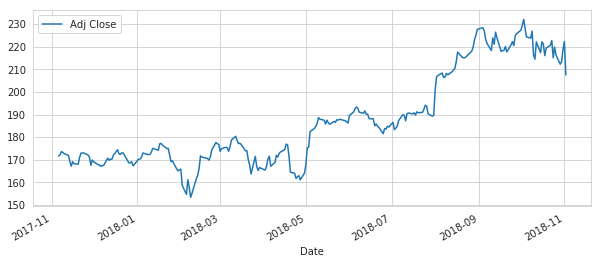

In [11]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

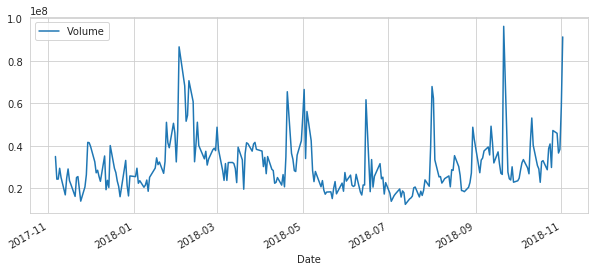

In [12]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [13]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

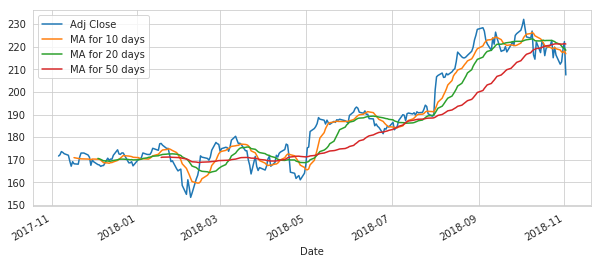

In [14]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

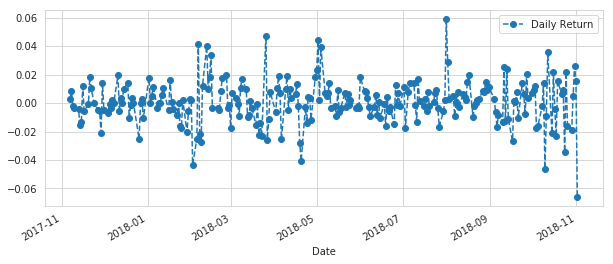

In [15]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

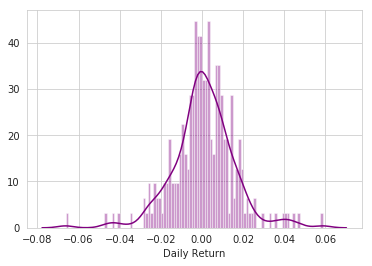

In [16]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

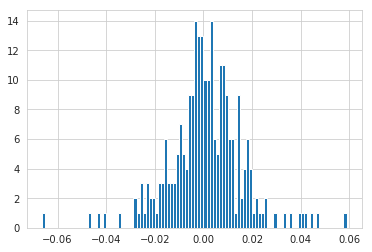

In [17]:
AAPL['Daily Return'].hist(bins=100)

In [18]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [19]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-11-06,171.654556,1120.660034,1025.900024,82.974594
2017-11-07,172.206223,1123.170044,1033.329956,82.778137
2017-11-08,173.614929,1132.880005,1039.849976,83.062996
2017-11-09,173.260300,1129.130005,1031.260010,82.601318
2017-11-10,172.686859,1125.349976,1028.069946,82.385223


In [20]:
tech_rets = closing_df.pct_change()

In [21]:
tech_rets.head()


Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-11-06,NaN,NaN,NaN,NaN
2017-11-07,0.003214,0.002240,0.007242,-0.002368
2017-11-08,0.008180,0.008645,0.006310,0.003441
2017-11-09,-0.002043,-0.003310,-0.008261,-0.005558
2017-11-10,-0.003310,-0.003348,-0.003093,-0.002616


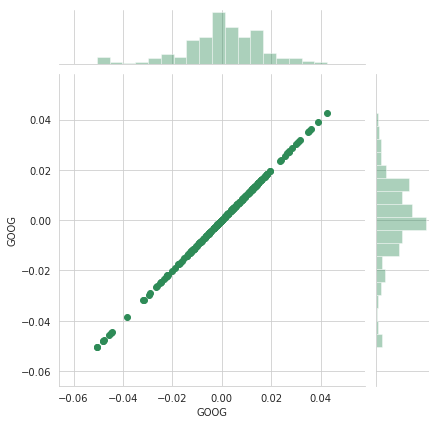

In [22]:
sns.jointplot('GOOG','GOOG',tech_rets,kind= 'scatter',color='seagreen')

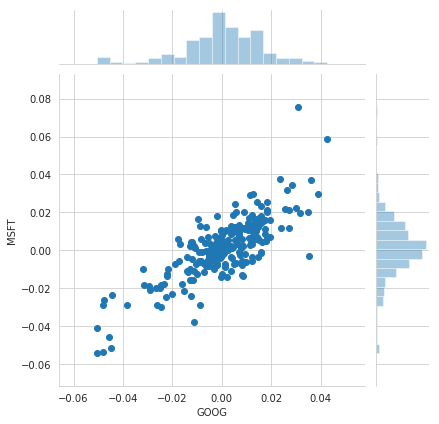

In [23]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

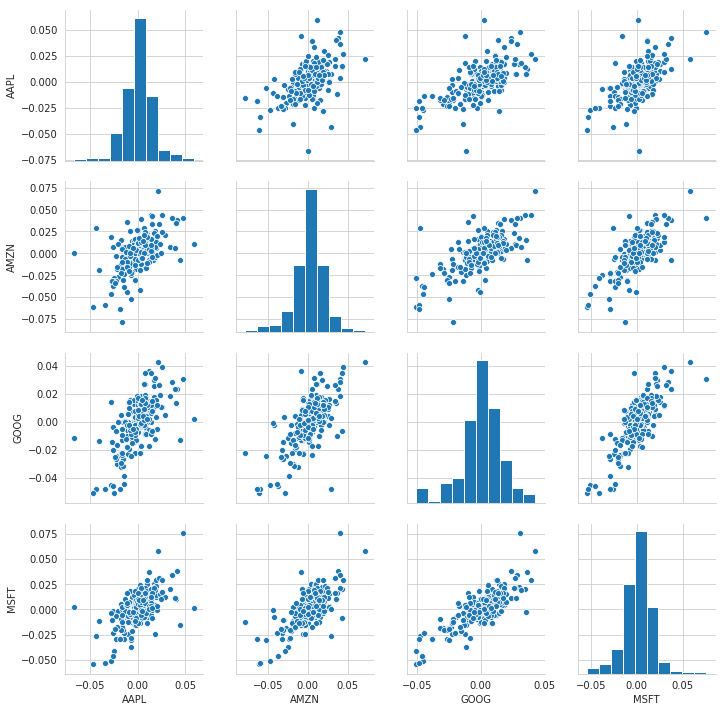

In [24]:
sns.pairplot(tech_rets.dropna())

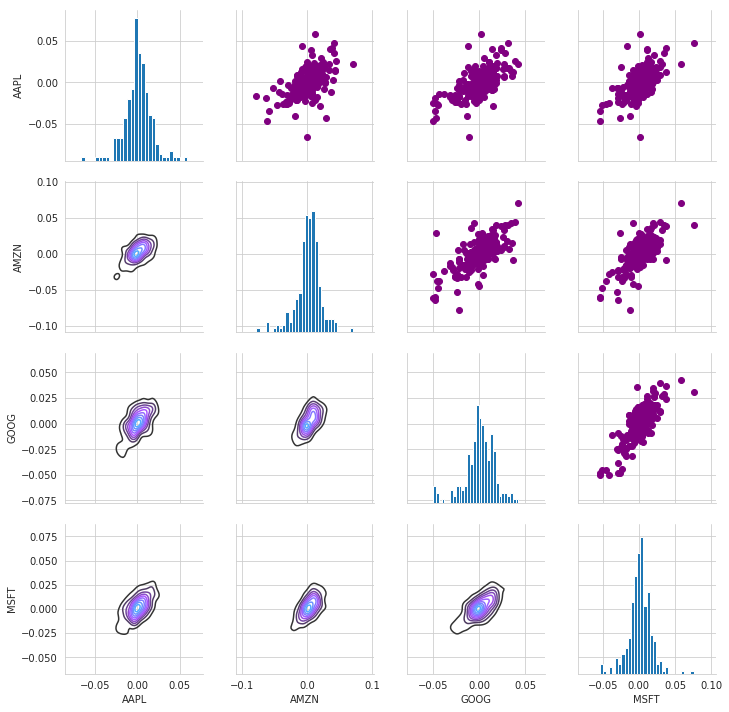

In [25]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

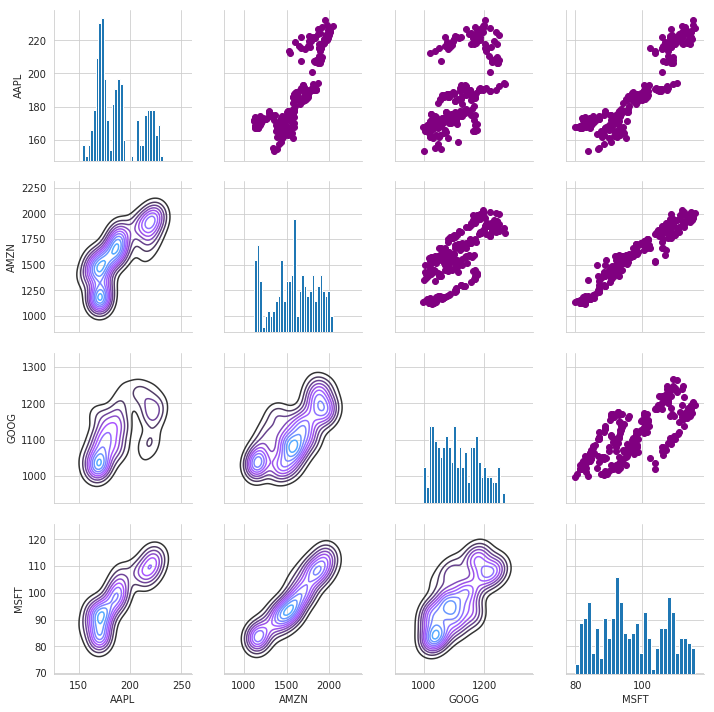

In [26]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

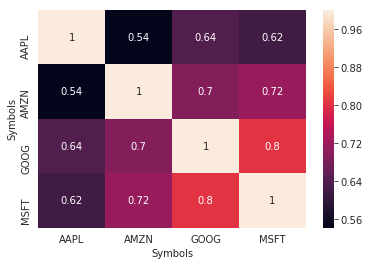

In [27]:
sns.heatmap(data=tech_rets.dropna().corr(),annot=True)

In [28]:
rets = tech_rets.dropna()

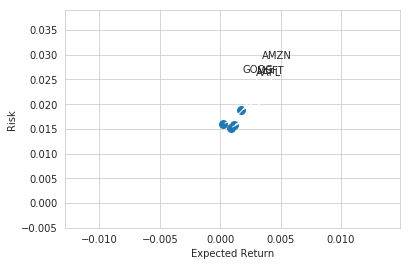

In [29]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va= 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

Calculating Value at Risk

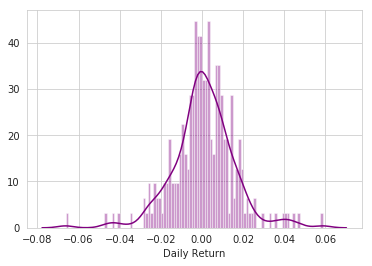

In [30]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [31]:
rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-11-07,0.003214,0.002240,0.007242,-0.002368
2017-11-08,0.008180,0.008645,0.006310,0.003441
2017-11-09,-0.002043,-0.003310,-0.008261,-0.005558
2017-11-10,-0.003310,-0.003348,-0.003093,-0.002616
2017-11-13,-0.004008,0.003395,-0.002257,0.000715


In [32]:
rets['AAPL'].quantile(0.05)

-0.023275936575234753

Value at Risk with Monte Carlo Method

In [33]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [39]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    
    return price

In [35]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-06,1034.869995,1025.000000,1028.989990,1025.900024,1125200,1025.900024
2017-11-07,1033.969971,1025.130005,1027.270020,1033.329956,1112300,1033.329956
2017-11-08,1043.521973,1028.449951,1030.520020,1039.849976,1088700,1039.849976
2017-11-09,1033.989990,1019.666016,1033.989990,1031.260010,1245200,1031.260010
2017-11-10,1030.760010,1025.280029,1026.459961,1028.069946,720000,1028.069946


Text(0.5,1,'Monte Carlo Analysis for Google')

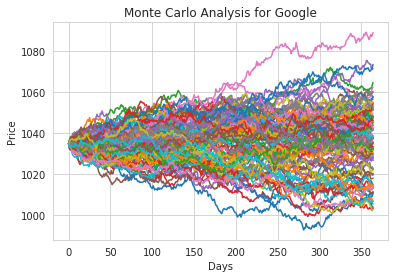

In [40]:
start_price = 1034.87

for run in range(100):
    plt.plot (stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [41]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

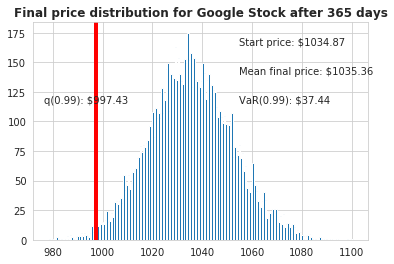

In [44]:
q=np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7, "Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" % days, weight = 'bold');